In [1]:
import sys
import cv2
from flight_model import FlightModel
import matplotlib.pyplot as plt


fmodel = FlightModel()
fmodel.z_threshold = .5

def assert_equal(got, expected):
    if got != expected:
        print("FAIL")
        print("Expected:", expected)
        print("Got:", got)
        exit(1)
    else:
        print("PASS")
        

def extract_directions(directions):
    test_directions = []
    # ["move_left", 12345] => test_directions.append("move_left")
    for direction in directions:
        if direction == "":
            test_directions.append("")
        else:
            test_directions.append(direction[0])
    return test_directions


def test_flight_directions(box, center_of_frame_coordinates, expected_result):
    adjustments = fmodel._get_adjustments(box, center_of_frame_coordinates)
    directions = fmodel._determine_flight_directions(adjustments)
    test_directions = extract_directions(directions)
    assert_equal(test_directions, expected_result)
    
def test_directions_from_image(directions, expected_result):
    test_directions = extract_directions(directions)
    assert_equal(test_directions, expected_result)



In [2]:
plt.rcParams['figure.figsize'] = [24.0, 14.0] # 24, 14


##################### RUNNING TESTS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
======== center-close



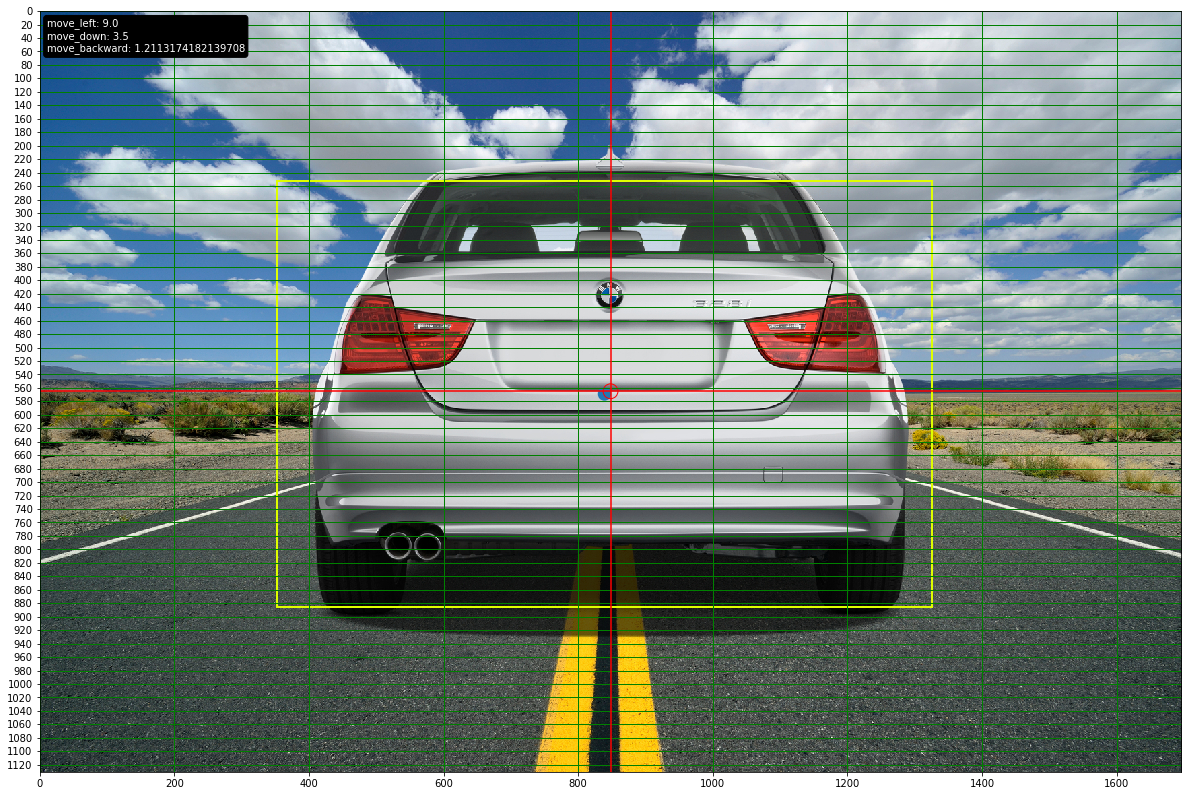

PASS
======== right-far



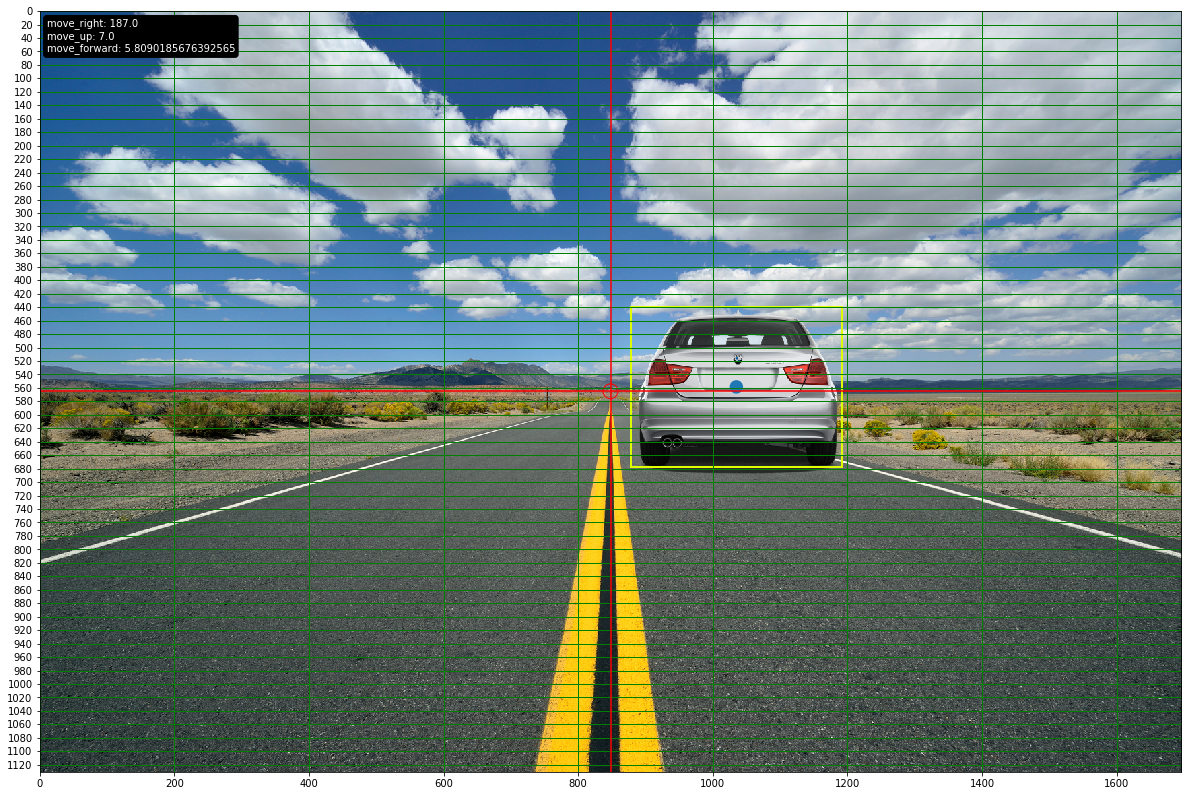

PASS
======== close-left



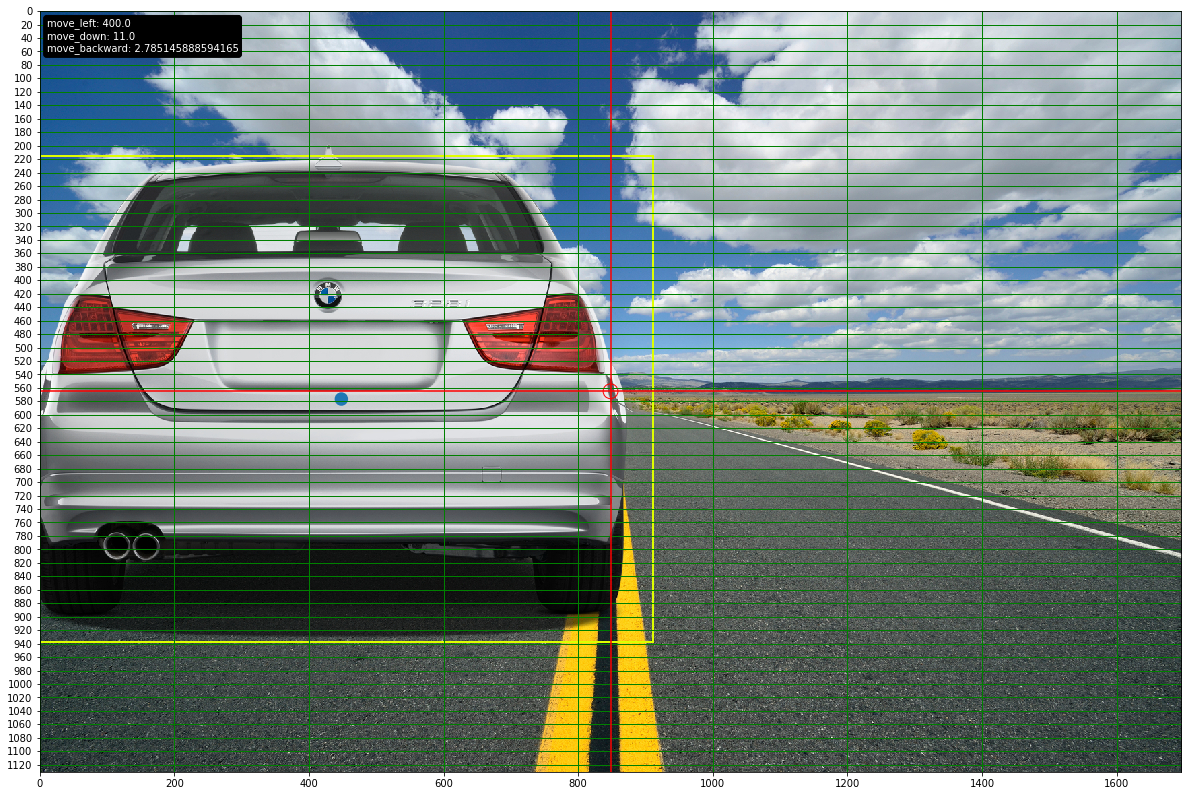

PASS


In [4]:

        
print("##################### RUNNING TESTS")
center_of_frame_coordinates = [256, 256]

# -- test x axis


box = {
    "centroid_x": 233,
    "centroid_y": center_of_frame_coordinates[1],
    "width": 50,
    "height": (center_of_frame_coordinates[1] * 2) * fmodel.z_threshold
}
expected_result = ["move_left", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["centroid_x"] = 257
expected_result = ["move_right", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["centroid_x"] = center_of_frame_coordinates[0]
expected_result = ["", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)


# -- test y axis
box["centroid_y"] = 257
expected_result = ["", "move_down", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["centroid_y"] = 254
expected_result = ["", "move_up", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)


# -- test z axis
box = {
    "centroid_x": center_of_frame_coordinates[0],
    "centroid_y": center_of_frame_coordinates[1],
    "width": 50,
    "height": (center_of_frame_coordinates[1]*2) * fmodel.z_threshold
}
    
expected_result = ["", "", ""]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["height"] = (center_of_frame_coordinates[1]*2) * (fmodel.z_threshold+.01)
expected_result = ["", "", "move_backward"]
test_flight_directions(box, center_of_frame_coordinates, expected_result)

box["height"] = (center_of_frame_coordinates[1]*2) * (fmodel.z_threshold-.01)
expected_result = ["", "", "move_forward"]
test_flight_directions(box, center_of_frame_coordinates, expected_result)


# ----- test images
print("======== center-close")
img = cv2.imread("./images/cars/center-close.jpg")
directions, car = fmodel.get_flight_directions(img)
rgb_image  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fmodel.plot_frame(rgb_image, car)
plt.show()
test_directions_from_image(directions, ["move_left", "move_down", "move_backward"])

print("======== right-far")
img = cv2.imread("./images/cars/right-far.jpg")
directions, car = fmodel.get_flight_directions(img)
rgb_image  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fmodel.plot_frame(rgb_image, car)
plt.show()
test_directions_from_image(directions, ["move_right", "move_up", "move_forward"])

print("======== close-left")
img = cv2.imread("./images/cars/close-left.jpg")
directions, car = fmodel.get_flight_directions(img)
rgb_image  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fmodel.plot_frame(rgb_image, car)
plt.show()
test_directions_from_image(directions, ["move_left", "move_down", "move_backward"])